<a href="https://colab.research.google.com/github/MrudulaAngel/Movie-Recommendation-System/blob/master/NLP_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

import string
import nltk
from nltk.corpus import stopwords

from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn import metrics

In [60]:
# Read the dataset
messages = pd.read_csv("spam.csv", encoding="latin-1")
messages.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


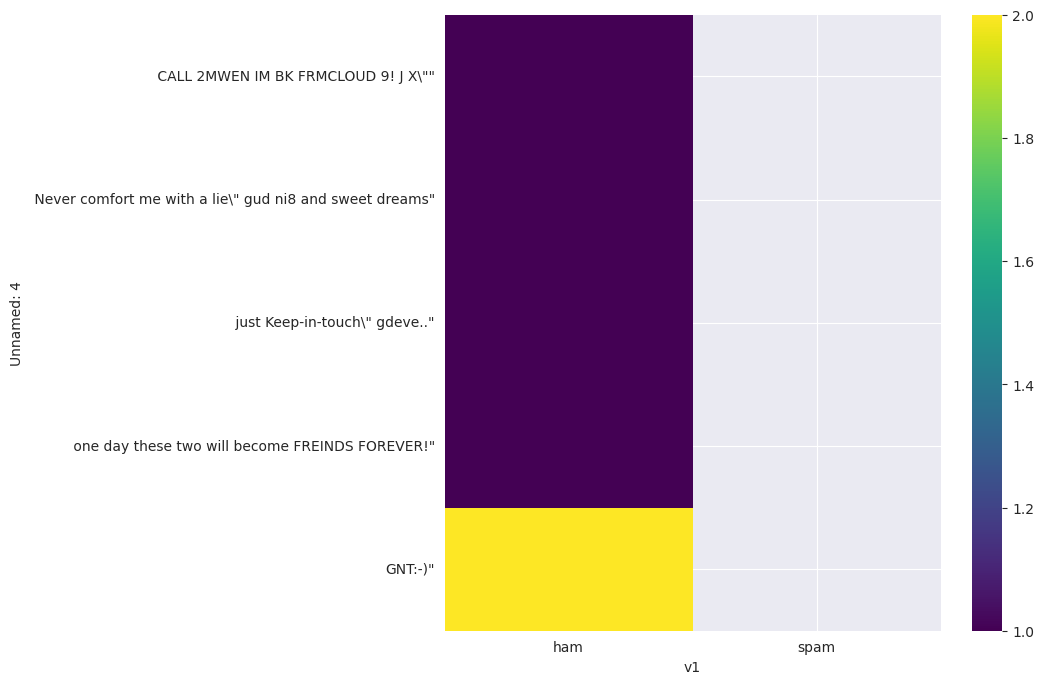

In [61]:
# @title v1 vs Unnamed: 4

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Unnamed: 4'].value_counts()
    for x_label, grp in messages.groupby('v1')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('v1')
_ = plt.ylabel('Unnamed: 4')

<Axes: xlabel='v1', ylabel='count'>

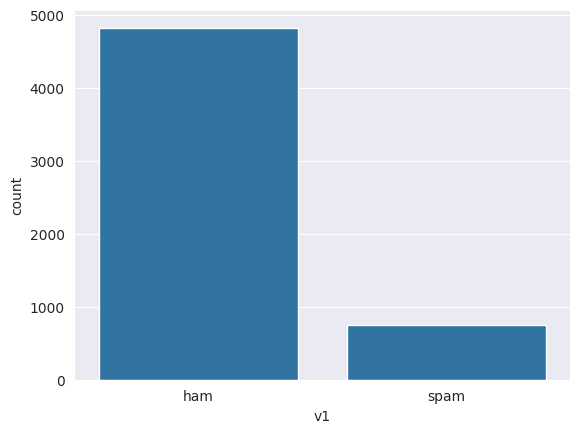

In [62]:
#spam vs ham frequency plot

sns.countplot(data=messages, x='v1')

In [63]:
messages.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


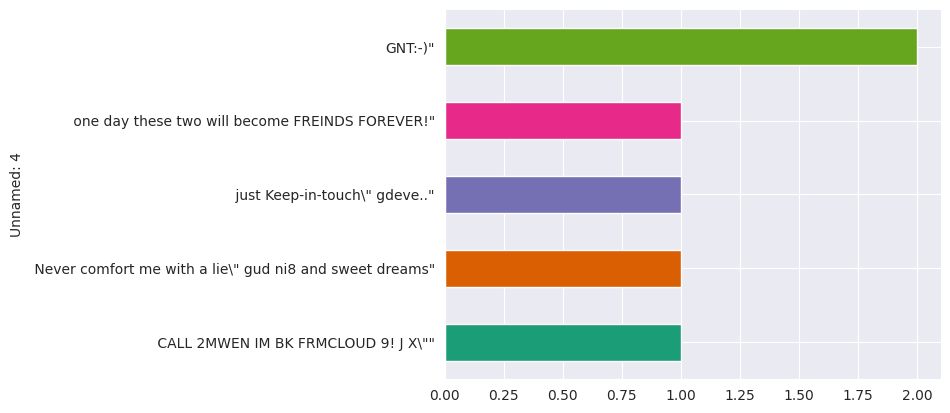

In [64]:
from matplotlib import pyplot as plt
import seaborn as sns
messages.groupby('Unnamed: 4').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [65]:
messages = messages.drop(labels = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)
messages.columns = ["label", "message"]

In [66]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


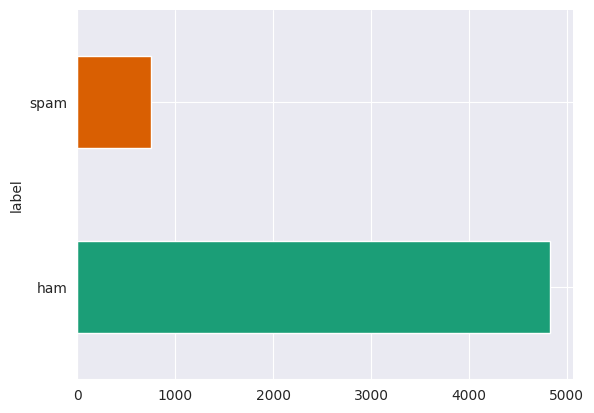

In [67]:
# @title label

from matplotlib import pyplot as plt
import seaborn as sns
messages.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

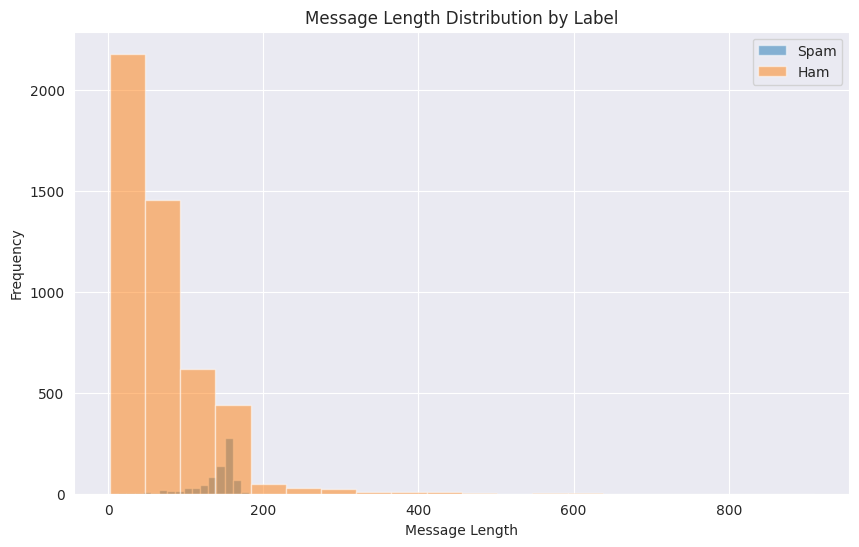

In [68]:
# @title Message Length Distribution by Label

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.hist(messages[messages['label'] == 'spam']['message'].str.len(), alpha=0.5, label='Spam', bins=20)
plt.hist(messages[messages['label'] == 'ham']['message'].str.len(), alpha=0.5, label='Ham', bins=20)
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.title('Message Length Distribution by Label')
_ = plt.legend()

In [69]:
#DATA ANALYSIS
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [70]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [71]:
messages.groupby('label').describe().T

label                              ham  \
message count                     4825   
        unique                    4516   
        top     Sorry, I'll call later   
        freq                        30   

label                                                        spam  
message count                                                 747  
        unique                                                653  
        top     Please call our customer service representativ...  
        freq                                                    4

In [72]:
messages['length'] = messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [73]:
# Count the frequency of top 5 messages.
messages['message'].value_counts().rename_axis(['message']).reset_index(name='counts').head()

,message,counts
0,"Sorry, I'll call later",30
1,I cant pick the phone right now. Pls send a me...,12
2,Ok...,10
3,7 wonders in My WORLD 7th You 6th Ur style 5th...,4
4,"Say this slowly.? GOD,I LOVE YOU &amp; I NEED ...",4


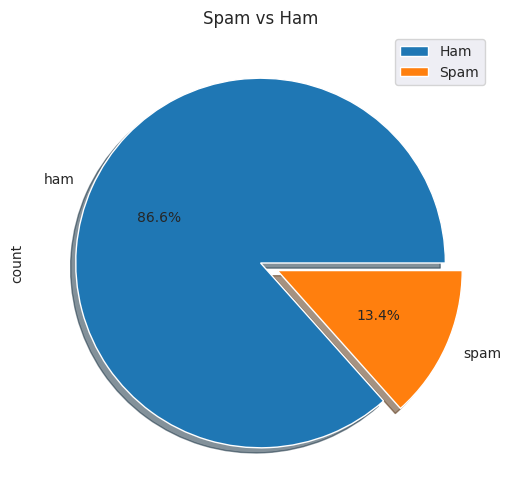

In [74]:
#DATA VISUALISATION
messages["label"].value_counts().plot(kind = 'pie',explode=[0, 0.1],figsize=(6, 6),autopct='%1.1f%%',shadow=True)
plt.title("Spam vs Ham")
plt.legend(["Ham", "Spam"])
plt.show()

Text(0, 0.5, 'Frequency')

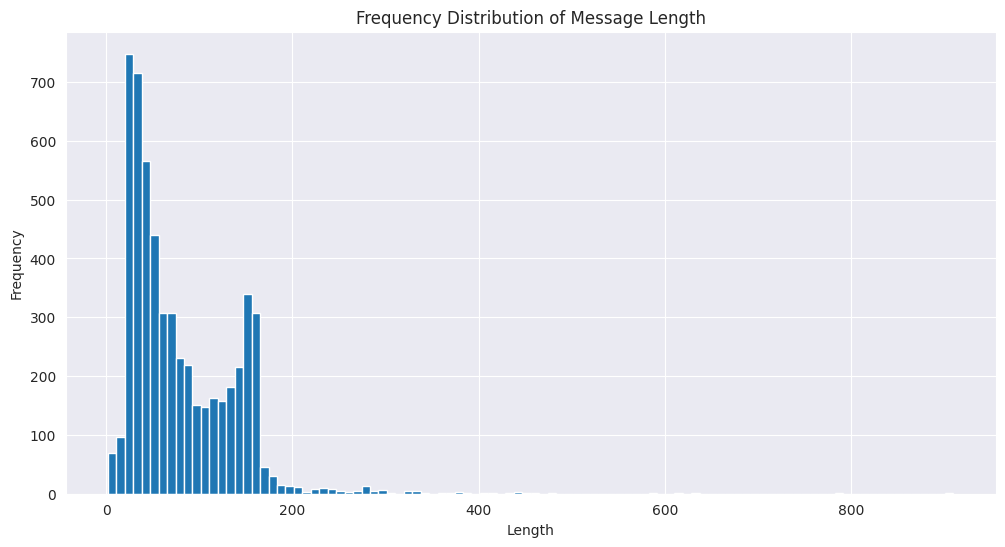

In [75]:
plt.figure(figsize=(12,6))
messages['length'].plot(bins=100, kind='hist') # with 100 length bins (100 length intervals)
plt.title("Frequency Distribution of Message Length")
plt.xlabel("Length")
plt.ylabel("Frequency")

In [76]:
messages['length'].describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: length, dtype: float64

In [77]:
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

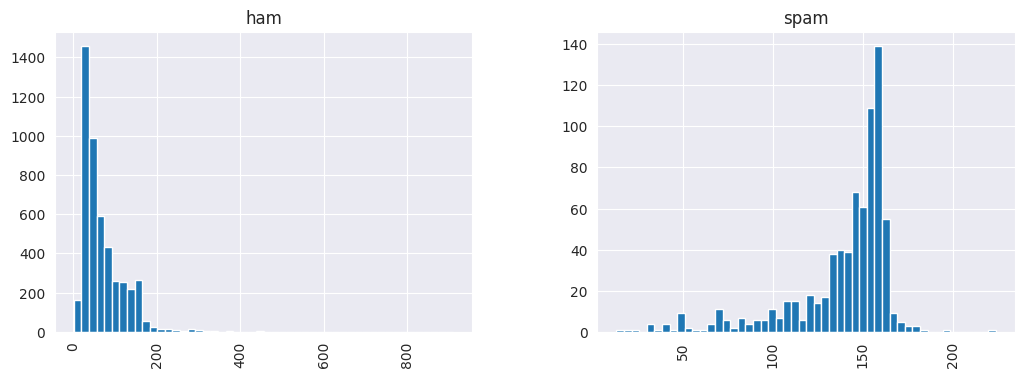

In [78]:
messages.hist(column='length', by='label', bins=50,figsize=(12,4))

In [79]:
#DATA TRANSFORMATION CLEAN PUNCTUATIONS,STOPWORDS//////////////////////////////
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [80]:
#clean punctuations

import string
messages['message'] = messages['message'].apply(lambda x: ''.join([char for char in x if char not in string.punctuation]))
print(messages['message'])


0       Go until jurong point crazy Available only in ...
1                                 Ok lar Joking wif u oni
2       Free entry in 2 a wkly comp to win FA Cup fina...
3             U dun say so early hor U c already then say
4       Nah I dont think he goes to usf he lives aroun...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                  Will Ì b going to esplanade fr home
5569    Pity  was in mood for that Soany other suggest...
5570    The guy did some bitching but I acted like id ...
5571                            Rofl Its true to its name
Name: message, Length: 5572, dtype: object


In [81]:
#TEXT PREPROCESSING
def text_preprocess(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    nopunc = nopunc.lower()

    # Now just remove any stopwords and non alphabets
    nostop=[word for word in nopunc.split() if word.lower() not in stopwords.words('english') and word.isalpha()]

    return nostop

In [82]:
spam_messages = messages[messages["label"] == "spam"]["message"]
ham_messages = messages[messages["label"] == "ham"]["message"]
print("No of spam messages : ",len(spam_messages))
print("No of ham messages : ",len(ham_messages))

No of spam messages :  747
No of ham messages :  4825


In [83]:
!pip install nltk
import nltk
nltk.download('stopwords')
spam_words = text_preprocess(spam_messages)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [84]:
# lets print some spam words
spam_words[:50]

['free',
 'entry',
 'wkly',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkts',
 'may',
 'text',
 'fa',
 'receive',
 'entry',
 'questionstd',
 'txt',
 'ratetcs',
 'apply',
 'hey',
 'darling',
 'weeks',
 'word',
 'back',
 'id',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chgs',
 'send',
 'rcvwinner',
 'valued',
 'network',
 'customer',
 'selected',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'valid',
 'hours',
 'onlyhad',
 'mobile',
 'months']

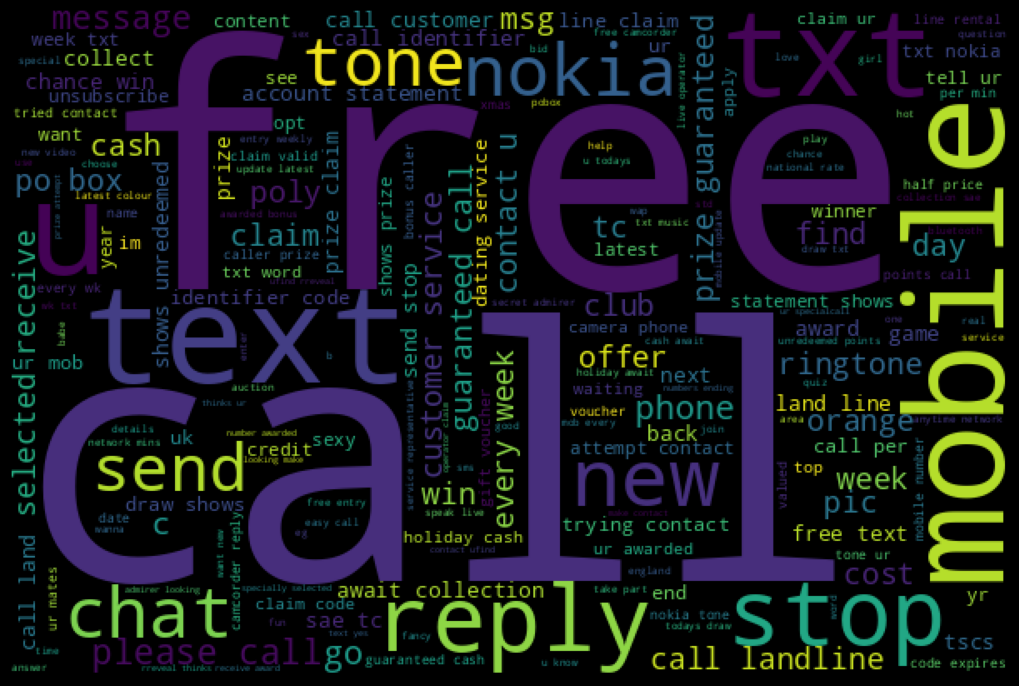

In [85]:
spam_wordcloud = WordCloud(width=600, height=400).generate(' '.join(spam_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [86]:
print("Top 50 Spam words are :\n")
print(pd.Series(spam_words).value_counts().head(50))

Top 50 Spam words are :

call          335
free          181
txt           149
ur            129
u             126
mobile        121
text          115
claim         112
stop          101
reply          98
prize          86
get            78
new            66
nokia          65
send           64
cash           62
contact        56
service        51
win            51
guaranteed     50
week           49
tone           47
phone          45
per            44
customer       43
please         42
chat           42
awarded        38
draw           38
line           35
latest         34
receive        33
mins           33
every          33
holiday        32
shows          31
landline       31
go             31
camera         30
box            30
number         30
message        30
live           29
code           29
po             29
video          28
chance         27
tcs            26
entry          26
collection     26
Name: count, dtype: int64


In [87]:

ham_words = text_preprocess(ham_messages)

In [88]:
ham_words[:50]

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amore',
 'watok',
 'lar',
 'joking',
 'wif',
 'u',
 'oniu',
 'dun',
 'say',
 'early',
 'hor',
 'u',
 'c',
 'already',
 'saynah',
 'dont',
 'think',
 'goes',
 'usf',
 'lives',
 'around',
 'thougheven',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aids',
 'patentas',
 'per',
 'request',
 'melle',
 'melle',
 'oru',
 'minnaminunginte',
 'nurungu']

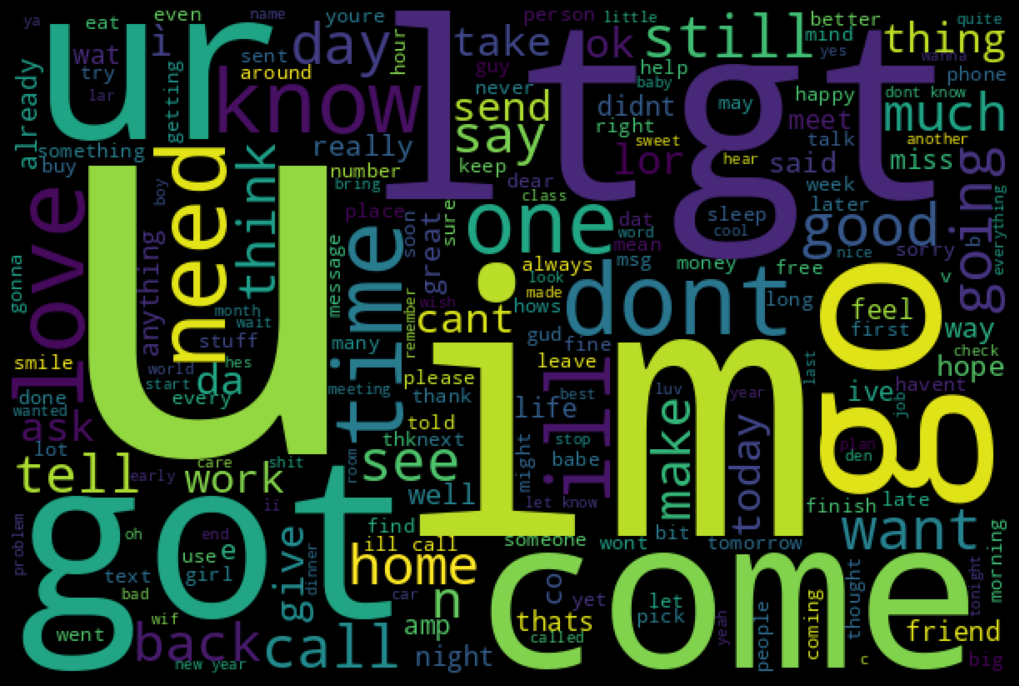

In [89]:
ham_wordcloud = WordCloud(width=600, height=400).generate(' '.join(ham_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [90]:
print("Top 50 Ham words are :\n")
print(pd.Series(ham_words).value_counts().head(50))

Top 50 Ham words are :

u         890
im        342
get       292
ltgt      257
go        240
ur        240
dont      230
got       218
like      218
know      217
ill       213
call      209
come      202
good      173
time      169
love      165
going     155
need      154
want      153
one       148
day       145
still     137
n         134
home      133
see       129
think     122
r         119
send      116
cant      113
back      111
lor       109
ok        108
ì         107
tell      107
take      106
da        103
much      102
hope       90
give       89
happy      88
way        87
make       86
ask        86
work       85
said       85
great      84
today      83
amp        82
say        81
really     81
Name: count, dtype: int64


In [91]:
# remove rarewords and print the rare words

# Find the rare words
rare_words = messages['message'].value_counts()[messages['message'].value_counts() < 2].index.tolist()

# Remove the rare words
messages = messages[~messages['message'].isin(rare_words)]

# Print the rare words
print(rare_words)


['For The First Time In The History Need Comfort And Luxury Are Sold At Same Price In India OnionRs ltgt  PetrolRs ltgt  BeerRs ltgt  SHESIL  ltgt', 'Also remember the beads dont come off Ever', 'Someone U know has asked our dating service 2 contact you Cant guess who CALL 09058095107 NOW all will be revealed POBox 7 S3XY 150p ', 'They have a thread on the wishlist section of the forums where ppl post nitro requests Start from the last page and collect from the bottom up', 'Hey morning what you come to ask pa', 'Sir Goodmorning Once free call me', 'Yesmum lookin strong', 'That means you got an A in epi shes fine Shes here now', 'Would me smoking you out help us work through this difficult time', 'Ki will send in  ltgt  min', 'I enjoy watching and playing football and basketball Anything outdoors And you', 'Why are u up so early', 'Ya that one is slow as poo', 'Ok c Ì then', 'Depends on individual lor e hair dresser say pretty but my parents say look gong U kaypoh I also dunno wat she c

In [92]:
# snowball stemming

from nltk.stem import SnowballStemmer

snowball_stemmer = SnowballStemmer('english')

messages['message'] = messages['message'].apply(lambda x: ' '.join([snowball_stemmer.stem(word) for word in x.split()]))

print(messages['message'])


2       free entri in 2 a wkli comp to win fa cup fina...
7       as per your request mell mell oru minnaminungi...
8       winner as a valu network custom you have been ...
9       had your mobil 11 month or more u r entitl to ...
11      six chanc to win cash from 100 to 20000 pound ...
                              ...                        
5535    i know you are thinkin malaria but relax child...
5539                                just sleepingand surf
5547    had your contract mobil 11 mnths latest motoro...
5553                             hahahaus your brain dear
5558                                 sorri ill call later
Name: message, Length: 722, dtype: object


In [93]:
# porter stemmer

from nltk.stem import PorterStemmer
ps = PorterStemmer()
messages['message'] = messages['message'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split()]))
print(messages['message'])


2       free entri in 2 a wkli comp to win fa cup fina...
7       as per your request mell mell oru minnaminungi...
8       winner as a valu network custom you have been ...
9       had your mobil 11 month or more u r entitl to ...
11      six chanc to win cash from 100 to 20000 pound ...
                              ...                        
5535    i know you are thinkin malaria but relax child...
5539                                just sleepingand surf
5547    had your contract mobil 11 mnth latest motorol...
5553                              hahahau your brain dear
5558                                 sorri ill call later
Name: message, Length: 722, dtype: object


In [94]:
# lancaster stemming

from nltk.stem import LancasterStemmer

ls = LancasterStemmer()
messages['message'] = messages['message'].apply(lambda x: ' '.join([ls.stem(word) for word in x.split()]))
print(messages['message'])


2       fre entr in 2 a wkli comp to win fa cup fin tk...
7       as per yo request mel mel oru minnaminungint n...
8       win as a valu network custom you hav been sele...
9       had yo mobl 11 mon or mor u r entitl to upd to...
11      six chant to win cash from 100 to 20000 pound ...
                              ...                        
5535    i know you ar thinkin malar but relax childr c...
5539                                just sleepingand surf
5547    had yo contract mobl 11 mnth latest motorol no...
5553                                hahahau yo brain dear
5558                                      sorr il cal lat
Name: message, Length: 722, dtype: object


In [95]:
# Regexp stemming

import re
def regexp_stemmer(text):
    """
    Stems the input text using regular expressions.

    Args:
        text (str): The text to stem.

    Returns:
        str: The stemmed text.
    """

    # Remove common prefixes
    text = re.sub(r'^un', '', text)
    text = re.sub(r'^re', '', text)
    text = re.sub(r'^dis', '', text)
    text = re.sub(r'^mis', '', text)

    # Remove common suffixes
    text = re.sub(r'sses$', 'ss', text)
    text = re.sub(r'ies$', 'i', text)
    text = re.sub(r'ss$', 'ss', text)
    text = re.sub(r's$', '', text)
    text = re.sub(r'eed$', 'ee', text)
    text = re.sub(r'ed$', '', text)
    text = re.sub(r'ing$', '', text)
    text = re.sub(r'ous$', 'ous', text)
    text = re.sub(r'ive$', '', text)
    text = re.sub(r'ful$', '', text)
    text = re.sub(r'able$', '', text)
    text = re.sub(r'ment$', '', text)
    text = re.sub(r'tion$', 'tion', text)
    text = re.sub(r'sion$', 'sion', text)
    text = re.sub(r'ism$', '', text)
    text = re.sub(r'er$', '', text)
    text = re.sub(r'est$', '', text)

    # Handle special cases
    text = re.sub(r'(.)\1{2}$', r'\1', text)
    text = re.sub(r'(.)\1{3}$', r'\1\1', text)

    return text

messages['message'] = messages['message'].apply(lambda x: ' '.join([regexp_stemmer(word) for word in x.split()]))
print(messages['message'])


2       fre entr in 2 a wkli comp to win fa cup fin tk...
7       a p yo qu mel mel oru minnaminungint nurungu v...
8       win a a valu network custom you hav been selec...
9       had yo mobl 11 mon or mor u r entitl to upd to...
11      six chant to win cash from 100 to 200 pound tx...
                              ...                        
5535    i know you ar thinkin malar but lax childr can...
5539                                just sleepingand surf
5547    had yo contract mobl 11 mnth lat motorol nok e...
5553                                hahahau yo brain dear
5558                                      sorr il cal lat
Name: message, Length: 722, dtype: object


In [96]:
# Lemmatization using WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
lemmatizer = WordNetLemmatizer()

messages['message'] = messages['message'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

print(messages['message'])


2       fre entr in 2 a wkli comp to win fa cup fin tk...
7       a p yo qu mel mel oru minnaminungint nurungu v...
8       win a a valu network custom you hav been selec...
9       had yo mobl 11 mon or mor u r entitl to upd to...
11      six chant to win cash from 100 to 200 pound tx...
                              ...                        
5535    i know you ar thinkin malar but lax childr can...
5539                                just sleepingand surf
5547    had yo contract mobl 11 mnth lat motorol nok e...
5553                                hahahau yo brain dear
5558                                      sorr il cal lat
Name: message, Length: 722, dtype: object


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [97]:
#MODEL TARINING AND EVALUATION
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score,accuracy_score

In [98]:
# Read the dataset
messages = pd.read_csv("spam.csv", encoding="latin-1")
messages.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [99]:
messages.rename(columns={'v1':'Class','v2':'Text'},inplace=True)
messages['numClass'] = messages['Class'].map({'ham':0, 'spam':1})
messages['Count']=0
for i in np.arange(0,len(messages.Text)):
    messages.loc[i,'Count'] = len(messages.loc[i,'Text'])

In [100]:
messages.head()

,Class,Text,Unnamed: 2,Unnamed: 3,Unnamed: 4,numClass,Count
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,0,111
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,1,155
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,0,61


In [101]:
# Unique values in target set
print("Unique values in the Class set: ", messages.Class.unique())

Unique values in the Class set:  ['ham' 'spam']


In [102]:
ham  = messages[messages.numClass == 0]
ham_count  = pd.DataFrame(pd.value_counts(ham['Count'],sort=True).sort_index())
print("Number of ham messages in data set:", ham['Class'].count())
#print("Ham Count value", ham_count['Count'].count())

Number of ham messages in data set: 4825


In [103]:
spam = messages[messages.numClass == 1]
spam_count = pd.DataFrame(pd.value_counts(spam['Count'],sort=True).sort_index())
print("Number of spam messages in data set:", spam['Class'].count())
#print("Spam Count value:", spam_count['Count'].count())

Number of spam messages in data set: 747


In [104]:
# remove stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
messages['Text'] = messages['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
messages.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Class,Text,Unnamed: 2,Unnamed: 3,Unnamed: 4,numClass,Count
0,ham,"Go jurong point, crazy.. Available bugis n gre...",NaN,NaN,NaN,0,111
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,0,29
2,spam,Free entry 2 wkly comp win FA Cup final tkts 2...,NaN,NaN,NaN,1,155
3,ham,U dun say early hor... U c already say...,NaN,NaN,NaN,0,49
4,ham,"Nah I think goes usf, lives around though",NaN,NaN,NaN,0,61


In [105]:
# intialize  count vectorizer
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [106]:
X = vectorizer.fit_transform(messages.Text)
# Extract target column 'Class'
y = messages.numClass

In [107]:
#Performing test train Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, train_size=0.80, random_state=None)

In [108]:
# Show the results of the split
print("\n")
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))
print("\n")



Training set has 4457 samples.
Testing set has 1115 samples.




In [109]:
objects = ('Multi-NB','SVM','KNN', 'RF', 'AdaBoost')

In [110]:
def train_classifier(clf, X_train, y_train):
    clf.fit(X_train, y_train)

In [111]:
# function to predict features
def predict_labels(clf, features):
    return(clf.predict(features))

In [112]:
A = MultinomialNB(alpha=1.0,fit_prior=True)
B=  LinearSVC()
C = KNeighborsClassifier(n_neighbors=1)
D = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=None)
E = AdaBoostClassifier(n_estimators=100)

In [113]:
clf = [A,B,C,D,E]
acc_score = [0,0,0,0,0]

In [114]:
for a in range(0,5):
    print(objects[a])
    train_classifier(clf[a], X_train, y_train)
    y_pred = predict_labels(clf[a],X_test)
    pred_val = f1_score(y_test, y_pred)
    acc_score[a]=accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)
    print("Accuracy in %:")
    print(acc_score[a]*100)
    print("F1 Score")
    print(pred_val)
    print("\n")

Multi-NB
Accuracy in %:
97.9372197309417
F1 Score
0.9198606271777003


SVM
Accuracy in %:
98.29596412556054
F1 Score
0.9272030651340997


KNN
Accuracy in %:
94.61883408071749
F1 Score
0.7272727272727273


RF
Accuracy in %:
96.05381165919282
F1 Score
0.8135593220338984


AdaBoost
Accuracy in %:
97.66816143497758
F1 Score
0.9015151515151516




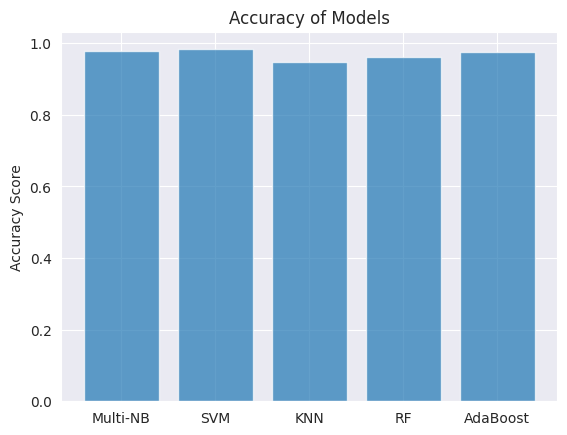

In [115]:
y_pos = np.arange(len(objects))
y_val = [ x for x in acc_score]
plt.bar(y_pos,y_val, align='center', alpha=0.7)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy Score')
plt.title('Accuracy of Models')
plt.show()